In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score

df = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")

# Pràctica 1: Resolem un problema de classificació

## Objectius

Els objectius d’aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificació, tècniques d’emplenament de valors perduts i validació creuada.

* Comparar diferents models de classificació.

* Realitzar la cerca d’hiperparàmetres.

* Entendre i implementar la validació creuada.

* Analitzar detalladament els resultats obtinguts durant l’entrenament dels diferents models.

Aquesta pràctica és prèvia al cas Kaggle que realitzareu durant la segona part de l’assignatura. En aquesta primera fase les preguntes estan definides, però us ha de servir d’aprenentatge per saber com estructurar un projecte d’aprenentatge automàtic, ja que en el cas Kaggle no tindreu les preguntes pautades.

## Bases de dades
En aquesta pràctica farem servir la base de dades del *Titanic*. L’atribut a predir és *Survived*, que indica si cada passatger va sobreviure o no.

[Enllaç a les dades](https://www.kaggle.com/c/titanic/data)

## Treball en grup

La pràctica es durà a terme en grups de 2 o 3 persones. En casos excepcionals i degudament justificats, es podrà realitzar de manera individual.

## Seguiment i entrega de la pràctica

A la Pràctica 1 es proposen diverses tasques per fer una comparació adequada dels resultats obtinguts amb diferents mètodes de classificació aplicats a una mateixa base de dades.

Es realitzaran sessions de seguiment del treball, orientades a resoldre dubtes sobre les dades, aclarir els objectius de cada apartat de l’enunciat i comentar els resultats obtinguts durant l’anàlisi. És molt recomanable assistir-hi amb el treball ja avançat per tal de poder aprofitar millor la sessió.

Pel que fa a l’entrega, caldrà lliurar a través de Caronte el següent:

1. *Memòria* en format PDF o en la mateixa notebook, explicant els resultats obtinguts sobre la base de dades i incloent el codi en Python corresponent. Aquesta nota serà la mateixa per a tots els membres del grup. (9 punts)

2. *Presentació* amb els resultats (màxim 4 minuts). Aquesta nota serà individual. (1 punt)

*Nota*: En cas d’entregar la memòria en format PDF, cal adjuntar el codi en Python per separat. Si s’entrega en format notebook, aquest mateix document ja servirà com a codi.


# Continguts que s’avaluaran en la pràctica

1. **EDA (Exploratory Data Analysis)** – 1 punt

* Anàlisi de la mida i tipologia de les dades (0.25 pts)

* Primera valoració de correlacions (0.5 pts)

* Anàlisi de l’atribut target (0.25 pts)

2. **Preprocessament** – 2 punts

* Eliminació de valors nuls (0.5 pts)

* Codificació de variables categòriques (0.75 pts)

* Altres (PCA, normalització, etc.) (0.75 pts)

3. **Selecció de mètriques** – 1.5 punts

* Selecció de la mètrica més adequada pel problema (0.75 pts)

* Visualització de corbes ROC/AUC (0.75 pts)

4. **Selecció de models amb validació creuada** – 4 punts

* Selecció del millor model (2 pts)

* Cerca d’hiperparàmetres (2 pts)

5. **Anàlisi final** – 1.5 punts

Cal tenir en compte que les puntuacions dins de cada apartat són orientatives. La pràctica està estructurada a partir d’un seguit de preguntes guia en cada secció, relacionades amb els continguts avaluables. **No cal respondre-les totes**: el seu objectiu és ajudar-vos a reflexionar i aprofundir en els aspectes clau de cada apartat. Tot i així, és recomanable llegir-les prèviament i tenir-les en compte durant el desenvolupament de la pràctica.

**IMPORTANT**: El criteri principal d’avaluació serà la capacitat de mantenir una narrativa coherent a mesura que es presenten els resultats. No es penalitzarà deixar alguna pregunta sense respondre, sempre que el procés seguit i les conclusions extretes a partir dels resultats siguin consistents i ben fonamentats.

### 1. EDA (*Exploratory Data Analysis*) – **1 punt**

Abans de començar, és fonamental analitzar la base de dades assignada.  

**Preguntes:**  
-  **Quants atributs té la base de dades?** 
    - La base de dades te un total de 12 atributs. 
-  **Quin tipus d’atributs hi ha? (numèrics, temporals, categòrics, binaris, ...)**  

    - PassengerID → Numeric
    - Survived→Binari
    - Pclass→Categòric
    - Name→Categórico
    - Sex → Categòric
    - Age → numeric
    - Sibsp → numeric
    - Parch → numeric
    - Ticket→Categòric
    - Fare→ Numeric
    - Cabin→Categòric
    - Embarked→Categòric

-  **Com és el *target*? Quantes categories diferents té?** 
    - El target és de tipus binari, amb dos valors: 0 (no sobreviu) i 1 (sobreviu). Presenta una distribució desbalancejada, amb un 61.6% de morts davant d'un 38.4% de supervivents. Tot i això, considerem que no és necessari aplicar tècniques de balanceig, ja que aquesta distribució reflecteix la realitat històrica del Titanic. A més, un balanceig artificial podria introduir inconsistències en les prediccions i alterar els patrons reals del dataset.
    
-  **Hi ha valors nuls (*NaNs*) a les dades?**  
    - Columnes Amb NaNs:
        - Age : 177
        - Cabin : 687
        - Embarked : 2
    - Com podem veure hi ha 3 columnes amb Nans, els mes destacables son Age i cabin. pel que fa Age suposem que es ja que a alguns passatgers no es va tenir el registre correcte de la seva edat. Per altre banda Cabin, que tenim molts NaNs.Pel que fa la cabina creiem que no es va tenir un registre correcte de a quina cabina estaben sobretot els passatgers de 3ra classe, i amb la seguent estadisitica podem confirmar-ho:
    - Passatger amb NaNs a Cabina:
        - Clase 1: 40 pasajeros (5.8%)
        - Clase 2: 168 pasajeros (24.5%)
        - Clase 3: 479 pasajeros (69.7%)
    - Per ultim Embarked, com nomes tenim 2 dades NaNs o be podriem eliminar tot el registre de aquest dos passatger, o asignar el port en el cual mes passatgers van embarcar.
-  **Les etiquetes estan balancejades? (és a dir, hi ha una distribució similar entre categories?) Creus que la seva distribució pot afectar la classificació?**  
    - NO estan balencejada ja que per exemple hi ha bastants més homes que dones, va sobreviure molta menys gent de la que no ho va, les classes hi ha moltes mes persones de 3ra que de 1ra...Aixo pot dur a errors de detecció sobretot en les minories degut a aixo. el que també es un problema es el desbalansajament en y (supervivents o no supervivents), ja que si tenim que va morir un 62 percent dels passatges, podriem sempre donar com a resultat que mor i tindriem un 62% de accuracy.

-  **Es poden observar correlacions entre les variables explicatives (*X*) i la variable objectiu (*y*)?** 
    - Si Analitzem els 8 gàrfics de sota els cuals ens mostres relacio entre:
        - Supervivent Homes vs Dones.
        - Supervivencia Depenent del Port d'embarcament.
        - Supervivecnia segons la classe del passatger.
        - Supervivencia segons la edat
    - El nostre analisis ens ha determinat que el port d'embarcament no va tenir ningun tipus de relacio entre sobreviure o no ja que son proporcionalment bastant similars els dos grafs.
    - Per altre banda si que es pot veure que van sobreviure moltes mes dones que homes tot hi haber mes homes a la embarcació. per tant aqui si que tenim una relció entre x i y.
    - On si que trobaem una relacio molt notable entre la 'x' i 'y', seria la classe del passatger, ja que els que mes van sobreviure van ser els de 1ra classe teninnt en compte que era la classe menys numerosa entre els passatgers, i en cambi la classe on propriconalment es va morir mes gent e sla 3ra classe amb una gran diferencia.
    - Finalment per la edat també podem veure certa relacio en la supervivencia, en els nostres grafics em establerts 5 rangs de edats:
        - Nen: 0 - 11 anys (58.0%)
        - Adolescent: 12 - 17 anys (42.9%)
        - Jove: 18 - 34 anys (38.3%)
        - Adult: 35 - 59 anys (40.0%)
        - Persona_gran: 60 - 100 anys (22.7%)
    - Analitzant les dades i dos grafics referents als grups d'edat, podem veure com els grups de edats, quan mes gran menys tasa de sobreviure que l'anteorior grup. Pel que fa el grup d'adolescent i jove el percentage s'asimila molt per tant aqui podreim juntar els grups ja que realment no creiem que en aquest rang de edat la diferencia sigui molt alta en el que fa les possibilitats de sobriviure sino que pot anar mes deteminada per altres factors com que en en el titanic potser teniem mes dones del reng de adolescents que del de joves i aquest factor fa que tinguem aquesta petita difrencia en le percentage de sobreviure. En resum, la edat si que te un afecte en les possibilitats de sobreviure.

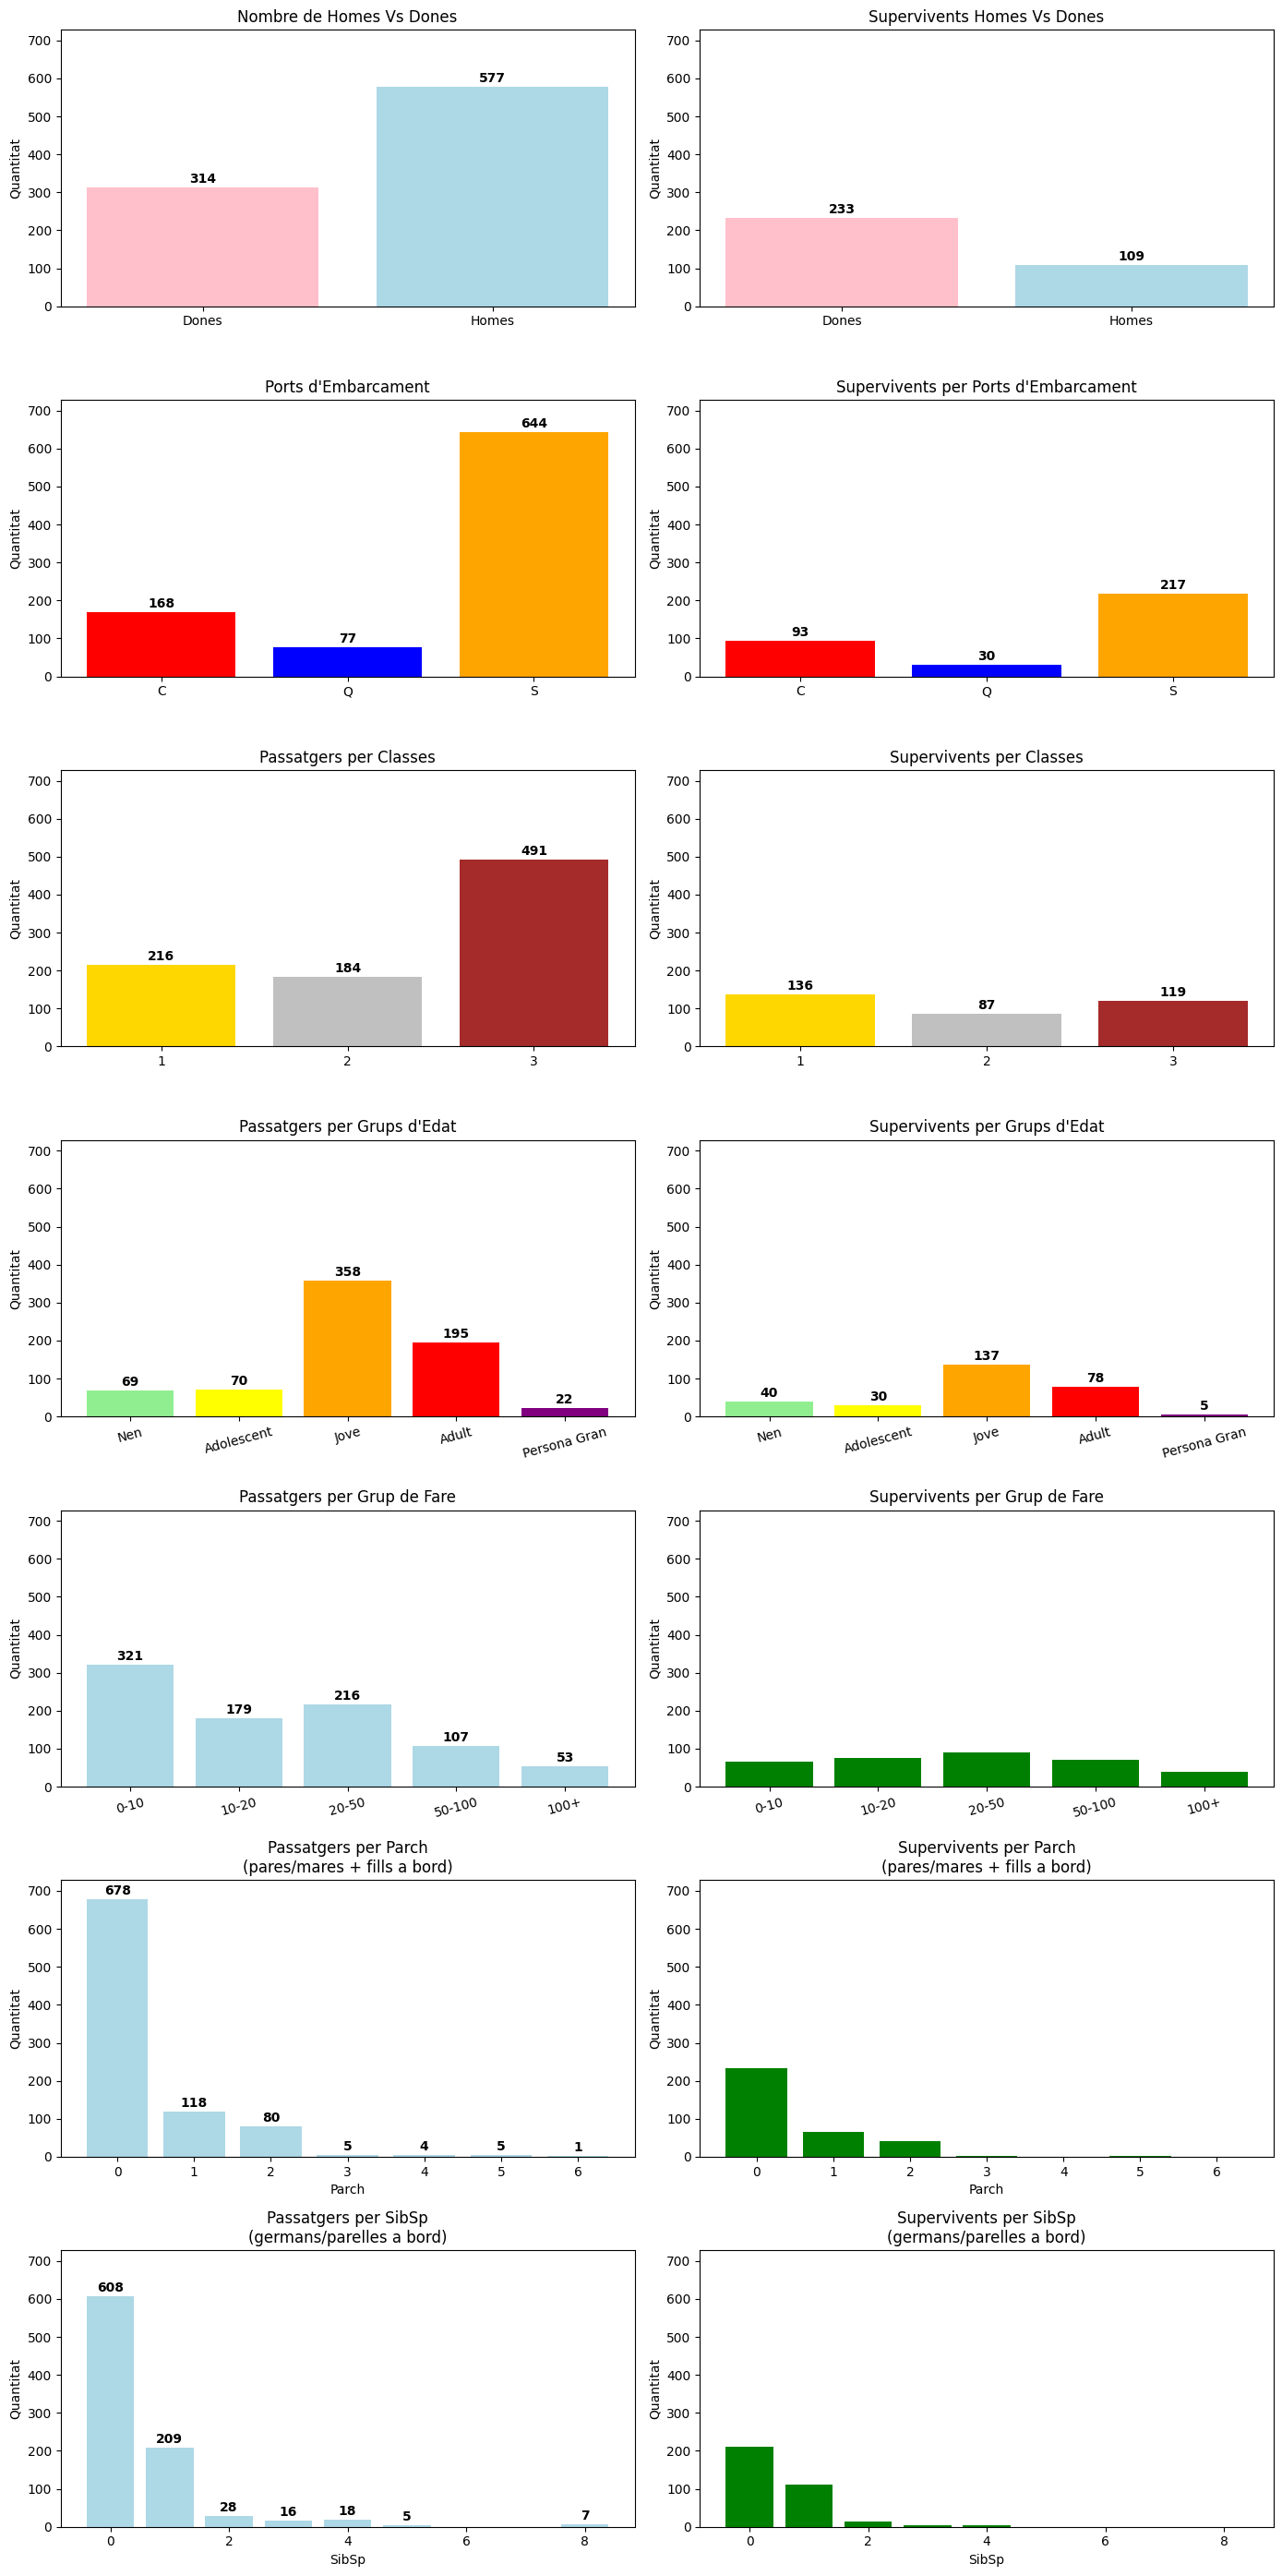

TAXA DE SUPERVIVÈNCIA PER GRUPS D'EDAT:
Nen: 0.580 (58.0%)
Adolescent: 0.429 (42.9%)
Jove: 0.383 (38.3%)
Adult: 0.400 (40.0%)
Persona Gran: 0.227 (22.7%)

TAXA DE SUPERVIVÈNCIA PER GRUPS DE FARE:
0-10: 0.206 (20.6%)
10-20: 0.425 (42.5%)
20-50: 0.417 (41.7%)
50-100: 0.654 (65.4%)
100+: 0.736 (73.6%)

TAXA DE SUPERVIVÈNCIA PER PARCH:
0: 0.344 (34.4%)
1: 0.551 (55.1%)
2: 0.500 (50.0%)
3: 0.600 (60.0%)
4: 0.000 (0.0%)
5: 0.200 (20.0%)
6: 0.000 (0.0%)

TAXA DE SUPERVIVÈNCIA PER SIBSP:
0: 0.345 (34.5%)
1: 0.536 (53.6%)
2: 0.464 (46.4%)
3: 0.250 (25.0%)
4: 0.167 (16.7%)
5: 0.000 (0.0%)
8: 0.000 (0.0%)


In [3]:
# --- Agrupaciones iniciales ---
survival_by_sex = df.groupby("Sex", observed=True)["Survived"].sum()
survival_by_embarked = df.groupby("Embarked", observed=True)["Survived"].sum()
survival_by_class = df.groupby("Pclass", observed=True)["Survived"].sum()

number_by_sex = df["Sex"].value_counts().sort_index()
number_by_embarked = df["Embarked"].value_counts().sort_index()
number_by_class = df["Pclass"].value_counts().sort_index()

# --- Agrupación por edad ---
bins = [0, 12, 18, 35, 60, 100]
labels = ['Nen', 'Adolescent', 'Jove', 'Adult', 'Persona Gran']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

number_by_age = df['Age_Group'].value_counts().sort_index()
survival_by_age = df.groupby('Age_Group', observed=True)['Survived'].sum()

# --- Agrupación por Fare ---
bins_fare = [0, 10, 20, 50, 100, 600]
labels_fare = ['0-10', '10-20', '20-50', '50-100', '100+']
df['Fare_Group'] = pd.cut(df['Fare'], bins=bins_fare, labels=labels_fare)

number_by_fare = df['Fare_Group'].value_counts().sort_index()
survival_by_fare = df.groupby('Fare_Group', observed=True)['Survived'].sum()

# --- Agrupación por Parch ---
number_by_parch = df['Parch'].value_counts().sort_index()
survival_by_parch = df.groupby('Parch', observed=True)['Survived'].sum()

# --- Agrupación por SibSp ---
number_by_sibsp = df['SibSp'].value_counts().sort_index()
survival_by_sibsp = df.groupby('SibSp', observed=True)['Survived'].sum()

# --- Gráfico principal (7x2) ---
fig, axs = plt.subplots(7, 2, figsize=(14, 28))
fig.subplots_adjust(hspace=0.6, wspace=0.3)

# Calcular el máximo Y para todos los gráficos
max_y = max(
    number_by_sex.max(), survival_by_sex.max(),
    number_by_embarked.max(), survival_by_embarked.max(),
    number_by_class.max(), survival_by_class.max(),
    number_by_age.max(), survival_by_age.max(),
    number_by_fare.max(), survival_by_fare.max(),
    number_by_parch.max(), survival_by_parch.max(),
    number_by_sibsp.max(), survival_by_sibsp.max()
) + 50

# --- 1ª fila: Sexo ---
bars1_sex = axs[0,0].bar(['Dones','Homes'], number_by_sex.values, color=['pink', 'lightblue'])
axs[0,0].set_title('Nombre de Homes Vs Dones')
axs[0,0].set_ylabel('Quantitat')
axs[0,0].set_ylim(0, max_y)

for bar, val in zip(bars1_sex, number_by_sex.values):
    axs[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_sex = axs[0,1].bar(['Dones', 'Homes'], survival_by_sex.values, color=['pink', 'lightblue'])
axs[0,1].set_title('Supervivents Homes Vs Dones')
axs[0,1].set_ylabel('Quantitat')
axs[0,1].set_ylim(0, max_y)

for bar, val in zip(bars2_sex, survival_by_sex.values):
    axs[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

# --- 2ª fila: Embarque ---
bars1_emb = axs[1,0].bar(number_by_embarked.index, number_by_embarked.values, color=['red', 'blue', 'orange'])
axs[1,0].set_title('Ports d\'Embarcament')
axs[1,0].set_ylabel('Quantitat')
axs[1,0].set_ylim(0, max_y)

for bar, val in zip(bars1_emb, number_by_embarked.values):
    axs[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_emb = axs[1,1].bar(survival_by_embarked.index, survival_by_embarked.values, color=['red', 'blue', 'orange'])
axs[1,1].set_title('Supervivents per Ports d\'Embarcament')
axs[1,1].set_ylabel('Quantitat')
axs[1,1].set_ylim(0, max_y)

for bar, val in zip(bars2_emb, survival_by_embarked.values):
    axs[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

# --- 3ª fila: Clase ---
bars1_class = axs[2,0].bar(['1', '2', '3'], number_by_class.values, color=['gold', 'silver', 'brown'])
axs[2,0].set_title('Passatgers per Classes')
axs[2,0].set_ylabel('Quantitat')
axs[2,0].set_ylim(0, max_y)

for bar, val in zip(bars1_class, number_by_class.values):
    axs[2,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_class = axs[2,1].bar(['1', '2', '3'], survival_by_class.values, color=['gold', 'silver', 'brown'])
axs[2,1].set_title('Supervivents per Classes')
axs[2,1].set_ylabel('Quantitat')
axs[2,1].set_ylim(0, max_y)

for bar, val in zip(bars2_class, survival_by_class.values):
    axs[2,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

# --- 4ª fila: Edat ---
bars1_age = axs[3,0].bar(number_by_age.index, number_by_age.values, color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
axs[3,0].set_title('Passatgers per Grups d\'Edat')
axs[3,0].set_ylabel('Quantitat')
axs[3,0].tick_params(axis='x', rotation=15)
axs[3,0].set_ylim(0, max_y)

for bar, val in zip(bars1_age, number_by_age.values):
    axs[3,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_age = axs[3,1].bar(survival_by_age.index, survival_by_age.values, color=['lightgreen', 'yellow', 'orange', 'red', 'purple'])
axs[3,1].set_title('Supervivents per Grups d\'Edat')
axs[3,1].set_ylabel('Quantitat')
axs[3,1].tick_params(axis='x', rotation=15)
axs[3,1].set_ylim(0, max_y)

for bar, val in zip(bars2_age, survival_by_age.values):
    axs[3,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

# --- 5ª fila: Fare ---
bars1_fare = axs[4,0].bar(number_by_fare.index, number_by_fare.values, color='lightblue')
axs[4,0].set_title('Passatgers per Grup de Fare')
axs[4,0].set_ylabel('Quantitat')
axs[4,0].tick_params(axis='x', rotation=15)
axs[4,0].set_ylim(0, max_y)

for bar, val in zip(bars1_fare, number_by_fare.values):
    axs[4,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_fare = axs[4,1].bar(survival_by_fare.index, survival_by_fare.values, color='green')
axs[4,1].set_title('Supervivents per Grup de Fare')
axs[4,1].set_ylabel('Quantitat')
axs[4,1].tick_params(axis='x', rotation=15)
axs[4,1].set_ylim(0, max_y)

for bar, val in zip(bars2_fare, survival_by_fare.values):
    axs[4,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10, color='white')

# --- 6ª fila: Parch ---
bars1_parch = axs[5,0].bar(number_by_parch.index, number_by_parch.values, color='lightblue')
axs[5,0].set_title('Passatgers per Parch\n(pares/mares + fills a bord)')
axs[5,0].set_xlabel('Parch')
axs[5,0].set_ylabel('Quantitat')
axs[5,0].set_ylim(0, max_y)

for bar, val in zip(bars1_parch, number_by_parch.values):
    axs[5,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_parch = axs[5,1].bar(survival_by_parch.index, survival_by_parch.values, color='green')
axs[5,1].set_title('Supervivents per Parch\n(pares/mares + fills a bord)')
axs[5,1].set_xlabel('Parch')
axs[5,1].set_ylabel('Quantitat')
axs[5,1].set_ylim(0, max_y)

for bar, val in zip(bars2_parch, survival_by_parch.values):
    axs[5,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10, color='white')

# --- 7ª fila: SibSp ---
bars1_sibsp = axs[6,0].bar(number_by_sibsp.index, number_by_sibsp.values, color='lightblue')
axs[6,0].set_title('Passatgers per SibSp\n(germans/parelles a bord)')
axs[6,0].set_xlabel('SibSp')
axs[6,0].set_ylabel('Quantitat')
axs[6,0].set_ylim(0, max_y)

for bar, val in zip(bars1_sibsp, number_by_sibsp.values):
    axs[6,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10)

bars2_sibsp = axs[6,1].bar(survival_by_sibsp.index, survival_by_sibsp.values, color='green')
axs[6,1].set_title('Supervivents per SibSp\n(germans/parelles a bord)')
axs[6,1].set_xlabel('SibSp')
axs[6,1].set_ylabel('Quantitat')
axs[6,1].set_ylim(0, max_y)

for bar, val in zip(bars2_sibsp, survival_by_sibsp.values):
    axs[6,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, f'{int(val)}',
                  ha='center', va='bottom', fontweight='bold', fontsize=10, color='white')

plt.tight_layout()
plt.show()

# --- TAXAS DE SUPERVIVÈNCIA (impresión en consola) ---
print("TAXA DE SUPERVIVÈNCIA PER GRUPS D'EDAT:")
print("=" * 45)
survival_rate_by_age = df.groupby('Age_Group', observed=True)['Survived'].mean()
for grup, taxa in survival_rate_by_age.items():
    print(f"{grup}: {taxa:.3f} ({taxa*100:.1f}%)")

print("\nTAXA DE SUPERVIVÈNCIA PER GRUPS DE FARE:")
print("="*45)
survival_rate_by_fare = df.groupby('Fare_Group', observed=True)['Survived'].mean()
for grup, taxa in survival_rate_by_fare.items():
    print(f"{grup}: {taxa:.3f} ({taxa*100:.1f}%)")

print("\nTAXA DE SUPERVIVÈNCIA PER PARCH:")
print("="*45)
survival_rate_by_parch = df.groupby('Parch', observed=True)['Survived'].mean()
for grup, taxa in survival_rate_by_parch.items():
    print(f"{grup}: {taxa:.3f} ({taxa*100:.1f}%)")

print("\nTAXA DE SUPERVIVÈNCIA PER SIBSP:")
print("="*45)
survival_rate_by_sibsp = df.groupby('SibSp', observed=True)['Survived'].mean()
for grup, taxa in survival_rate_by_sibsp.items():
    print(f"{grup}: {taxa:.3f} ({taxa*100:.1f}%)")

### 2. Preprocessament (*normalització, tractament d’outliers, selecció de variables...*) – **2 punts**

Un cop conegudes les dades disponibles, cal preparar-les per als algoritmes d’aprenentatge. Segons la tipologia de dades, es poden filtrar atributs, aplicar reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar, o bé detectar i eliminar *outliers*.  

Consulteu la [documentació de *scikit-learn* sobre preprocessament](https://scikit-learn.org/stable/modules/preprocessing.html) per explorar les diferents opcions que ofereix.  

**Preguntes:**  
-  **Les dades estan normalitzades? Caldria fer-ho?** 
   - No, gran part de les dades no estan noramlitzades i per certs algorismes si que caldra nomralitzarl-les pero per a altres no.
      - Si s'han de normlitzar:
         - Regressió logística
         - SVM
         - KNN
      - No s'ha de normalitzar:
         - Arbres de decició
         - Random Forest
         - Gradient Boosting
-  **En cas de normalitzar, quin tipus de normalització seria més adient per a les vostres dades?** 
   - El tipus de normalització més adequat depèn del tipus d’algorisme que vulguem utilitzar. Per exemple, si treballem amb l’algorisme KNN (K-Nearest Neighbors), és recomanable aplicar l’estandardització. Aquesta tècnica ajusta totes les variables perquè tinguin la mateixa escala, situant-les al voltant del 0, amb valors positius i negatius. En concret, l’estandardització transforma les dades de manera que la mitjana sigui 0 i la desviació típica sigui 1. D’aquesta manera, totes les característiques tenen el mateix pes en el càlcul de distàncies, fet que millora el rendiment de l’algorisme.


- **Hi ha moltes dades sense informació (*NaNs*)? Tingueu en compte que alguns mètodes no les toleren durant l’aprenentatge.**  
   - Com ja hem comentat a la pregunta 1, només hi ha tres columnes amb NaNs, de les quals només dues són rellevants, ja que en una d’elles només hi ha dos NaNs, per tant és irrellevant. D’altra banda, de les altres dues, n’hi ha una molt afectada per NaNs, que és *Cabin*, amb 687 valors buits. Tot i això, és una variable que per a l’algorisme no aporta informació útil, i per tant la descartaríem, ja que amb tants NaNs tampoc val la pena omplir-la. En canvi, l’atribut *Age* sí que té 177 NaNs i pot ser útil per a l’anàlisi, així que el tindrem en compte i l’omplirem.

      - **Com afecta la classificació si les filtreu?**  
         - En el nostre cas, podríem filtrar la columna *Cabin*, ja que, com hem dit, no ens aporta informació rellevant. És cert que els passatgers amb cabina van sobreviure en un 66%, a diferència dels que no en tenien, amb només un 29% de supervivents. Aquesta estadística podria fer pensar que és una variable important, però en realitat no ho és, ja que gairebé tots els que tenen un registre de cabina eren de primera classe. Per tant, aquesta informació és redundant amb la variable *Classe*.  
         - El que podríem fer per omplir els NaNs seria assignar un camarot segons el bitllet, ja que d’aquest es pot extreure a quin tipus de cabina pertanyien (1a, 2a o 3a classe).  
         - Finalment, en l’atribut *Age* sí que hauríem d’omplir els 177 NaNs, ja que és una variable rellevant. En aquest cas, seria millor omplir-los a partir de la mediana, ja que la mitjana es podria veure afectada per valors extrems (persones molt joves o molt grans).

      - **I si les reompliu? Com ho faríeu? [Pista](https://scikit-learn.org/stable/modules/impute.html)**  
         - Segons la documentació de la llibreria *scikit-learn*, hi ha diferents maneres d’omplir els NaNs mitjançant la funció `SimpleImputer`. Entre elles trobem:
            - *Mean*: omplir amb la mitjana.  
            - *Median*: omplir amb la mediana (la més adequada per a *Age*).  
            - *Most_frequent*: omplir amb el valor més freqüent de la variable (aquesta opció la podríem utilitzar per omplir els dos NaNs de *Embarked*, o simplement eliminar aquestes dues files, ja que són molt poques).  
            - *Constant*: omplir amb una constant que decidim nosaltres.  



-  **Hi ha dades categòriques? Quina seria la codificació més adequada?**
   - Per codificar tindirem 5 atributs categorics entre elles es troba: Sex, Embarked, Pclass, Cabin i ticket.
      - **Sex**: Aquest el podrem cabiar a Binari: 0 = male i 1 = female.
      - **Cabin**: Aqui es una mica mes complicat de codificar ja que tenim moltes cabines diferents. El que podriem fer es calcular per cada cabina quina taxa de supervivencia va tenir. per exemple, Cabina C85, 3 passatgers i sobreviuen 2, la tasa seria del 0.66 i seria el valor que li asignariem i aixi amb totes les dades del atribut Cabin.
      - **Embarked**: Per aquesta podriem utilitzar *One-Hot Encoding*. Es basaria de eliminar el atribut Embarked, i afegirne 3, un per cada port: Cherbourg = Port_C, Queenstown = Port_Q, Southampton = Port_S. Per exemple si un pasatger es va pujar al Port_C asiganriem:
      Port_C = 1
      Port_Q = 0
      Port_S = 0
      I aixi amb tots els ports i passatgers.
      - **Ticket**: Aqui podem aplicar de nou l'estategia que em utilitzat per Cabin, i per a cada bitllet li asignem la taxa de supervivència de cada bitllet. Aqui nomes ens podem torbar un problema sobretot amb bitleets personals/individuals. Ja que per rls billetsde familias o grups si que possiblament trobarem valors que no siguien en els extrems pero per bitllets individuals sempre estarem en el extrem de 0 o 1.
- **Es poden extreure atributs addicionals a partir de les variables categòriques (per exemple, aplicant alguna regla sobre el text)?**
   - Si que podem trobar atributs adicionals, de fet, n'hi ha bastants, començarem pels que creiem que podria aportar-nos mes informació.
      - El primer seria extreure la lletra de la Cabina, de la cual tenim aquestes (A, B, C, D, E, F, G), Aquesta lletra ens indica la coberta en la que és troba la cabina. A sota tenim un mapa del titanic on ens mostra les cobertes i tenim aquestes dades:
         - A: 46.7% de supervivencia (15 passatgers)
         - B: 74.5% de supervivencia (47 passatgers)
         - C: 59.3% de supervivencia (59 passatgers)
         - D: 75.8% de supervivencia (33 passatgers)
         - E: 75.0% de supervivencia (32 passatgers)
         - F: 61.5% de supervivencia (13 passatgers)
         - G: 50.0% de supervivencia (4 passatgers)
         - T: 0.0% de supervivencia (1 passatgers)
         - Sin Cabina: 30.0% de supervivencia (687 passatgers)
      - Primer podem veure un Error en les dades ja que no hi ha cap coberta T, per tant no la tindrem en compte i la eliminarem de les dades.
      - Despres analitzant les dades des del nostre punt de vista hem arribat a la conclusó que no te relació alguna ja que podriem pensar que les cobertes més aprop dels bots salvavides serien les que tenen la probilitat més alta de sobreviure. i realment no es així, per tant al moment de entrenar els algorismes no tindrem en compte aquest atribut adicional. Una cosa que també vam veure es que els camarots estan ordenats per ordre de preu per quan més amunt, de mes classe es el camarot. Tenient en compte això i l'ho ja mencionat obtarem per descartar l'atribut cabin ja que el considerem irrellevant per els models al moment de fer les prediccións.

<p align="center">
  <img src="img/Titanic_cutaway_diagram.png" width="550">
</p>

- **Es poden extreure atributs addicionals a partir de les variables categòriques (per exemple, aplicant alguna regla sobre el text, !CONTINUACIÓ!)?**
   - En un principi vam pensar que podem extreure una gran informació es en el bitllet ja que graciés a aquest podem saber extreure de quin tipus de camarot es tracte aquell bitllet i per tant omplir els NaNs que tenim a la cabina. Finalment ens hem donat conta que amb el billet no podrem extreure aquesta informació. Degut a aquest problema ens hem donat conta que de on si que podem treure la informació de quin tipus de camaort tenia cada passatger es segons el Fare ja que amb el preu pagat podriem deduir a quina coberta es trobaba.

-  **Caldria aplicar PCA? Quins beneficis o inconvenients tindria?**  
    - Nosaltres creiem que no caldria aplicar PCA en aquest dataset. Els principals inconvenients són la pèrdua d'interpretabilitat de les variables i la dificultat per processar les múltiples variables categòriques com Sex, Cabin i Embarked. Els beneficis de reduir dimensionalitat no justifiquen la pèrdua de significat en un cas amb relativament poques variables. Si que es veritat qeu podriem reduir molt la complexitat i per tant el temps de resolucó del algorisme pero pensem que seria a cambi de un cost molt alt a nivell de precició del mateix.
-  **Seria útil aplicar alguna tècnica de selecció de *features*? Ho trobeu necessari?**  
   
   - **Atributs que ens quedem:**
      - **Pclass** → sí, molt rellevant (classe social influència supervivència)
      - **Sex** → sí, molt rellevant (dones tenen més probabilitat de sobreviure)
      - **Fare** → sí, rellevant (preu del bitllet relacionat amb la classe i possibilitat de sobreviure)
      - **Age** → sí, rellevant (edat pot influir) → tractament Nans amb mediana.

   - **Atributs que descartadem:**
      - **PassengerId** → identificador únic, no aporta res.
      - **Name / Ticket / Cabin** → informació textual molt complicada de convertir en algo útils sense preprocesament. Com ja hem analitzant a part de tenir moltes NaNs no he torbat ninguna realcio adicional amb el Target, que no ens pugui aportar el atribut de classe.
      - **Embarked** → Com ja hem vist no aporta nignuna relació amb la supervivència dels passatger, ja que en un graf fet anterioment les dades son bastant proprocionals a nivell de target per a cda port.
      
   - **Atributs que en qeudarem per PolynomialFeatures:**
      - **SibSp / Parch** → poden aportar alguna info (família), però sovint la relació és feble tal i com hem vist en els gràfics generats en el punt anterior tot i aixó ens elq uedarem per fer una versio amb PolynomialFeatures ja que combinades potser si que ens poden aportar infomració extra.

   - **Target:**
      - Survived → variable objectiu.

-  **Es podrien aplicar *PolynomialFeatures* per millorar la classificació? En quins models tindria sentit fer-ho?** 
   - Tindira Sentit amb certs matizos. Primerament, dels nostres models tindira sentit en els lineals:
      - Regressió logística --> Molt beneficiada, necessita característiques polinòmiques per capturar no linealitats.
      - SVM amb kernel lineal --> Similar a regressió logística, es beneficia d'interaccions.
   - En el resto de algorsimes no tindira massa sentit fer-ho ja que és útil principalment per a models lineals, mentre que els models basats en arbres ja gestionen interaccions automàticament.
   - La nostra proposta es que podriem afegir els seguents:
      - **TamanyFam**: Combinació de SibSp + Parch per representar la mida total de la família a bord
      - **VaSol**: Indicador binari que identifica passatgers que viatjaven sense familiars
      - **Sex_Pclass**: Interacció entre sexe i classe social per capturar el major risc d'homes en tercera classe
      - **Age_Class**: Combinació d'edat i classe per identificar grups d'edat vulnerables en classes específiques
   - Aquestes interaccions capturen relacions clau del domini problemàtic sense afegir complexitat unnecessary.

### En el seguent codi prepararem diferents Datasets segons el nostre analisi fet.

In [4]:
#dataset Reduit als 4 Atributs i Sex comebrtit a binari (male=0, female=1)
df = pd.read_csv('train.csv')
df_reduit_4_simple = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()
age_median = df_reduit_4_simple['Age'].median()
df_reduit_4_simple['Age'] = df_reduit_4_simple['Age'].fillna(age_median)
df_reduit_4_simple['Sex'] = df_reduit_4_simple['Sex'].map({'male': 0, 'female': 1})
df_reduit_4_simple

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0
...,...,...,...,...,...
886,2,0,27.0,13.0000,0
887,1,1,19.0,30.0000,1
888,3,1,28.0,23.4500,0
889,1,0,26.0,30.0000,1


In [5]:
# Dataset reduït als 4 atributs + Sex binari (male=0, female=1) i normalitzat amb StandardScaler
df = pd.read_csv('train.csv')
df_reduit_4_norm = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']].copy()

# Omplim valors nuls de l'edat amb la mediana
age_median = df_reduit_4_norm['Age'].median()
df_reduit_4_norm['Age'] = df_reduit_4_norm['Age'].fillna(age_median)

# Convertim Sex a binari
df_reduit_4_norm['Sex'] = df_reduit_4_norm['Sex'].map({'male': 0, 'female': 1})

# Normalitzem les variables
columns_to_normalize = ['Pclass', 'Sex', 'Age', 'Fare']
scaler = StandardScaler()
df_reduit_4_norm[columns_to_normalize] = scaler.fit_transform(df_reduit_4_norm[columns_to_normalize])

df_reduit_4_norm


,Pclass,Sex,Age,Fare,Survived
0,0.827377,-0.737695,-0.565736,-0.502445,0
1,-1.566107,1.355574,0.663861,0.786845,1
2,0.827377,1.355574,-0.258337,-0.488854,1
3,-1.566107,1.355574,0.433312,0.420730,1
4,0.827377,-0.737695,0.433312,-0.486337,0
...,...,...,...,...,...
886,-0.369365,-0.737695,-0.181487,-0.386671,0
887,-1.566107,1.355574,-0.796286,-0.044381,1
888,0.827377,1.355574,-0.104637,-0.176263,0
889,-1.566107,-0.737695,-0.258337,-0.044381,1


In [6]:
#dataset Reduit als 4 Atributs i Sex comebrtit a binari (male=0, female=1) pero amb les PolynomialFeatures mencionades
df = pd.read_csv('train.csv')

df_features = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']].copy()

age_median = df_features['Age'].median()
df_features['Age'] = df_features['Age'].fillna(age_median)

df_features['Sex'] = df_features['Sex'].map({'male': 0, 'female': 1})

df_features['TamanyFam'] = df_features['SibSp'] + df_features['Parch']
df_features['VaSol'] = (df_features['TamanyFam'] == 0).astype(int)
df_features['Sex_Pclass'] = df_features['Sex'] * df_features['Pclass']
df_features['Age_Class'] = df_features['Age'] * df_features['Pclass']

df_features = df_features.drop(['SibSp', 'Parch'], axis=1)

df_features

,Pclass,Sex,Age,Fare,Survived,TamanyFam,VaSol,Sex_Pclass,Age_Class
0,3,0,22.0,7.2500,0,1,0,0,66.0
1,1,1,38.0,71.2833,1,1,0,1,38.0
2,3,1,26.0,7.9250,1,0,1,3,78.0
3,1,1,35.0,53.1000,1,1,0,1,35.0
4,3,0,35.0,8.0500,0,0,1,0,105.0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,0,0,1,0,54.0
887,1,1,19.0,30.0000,1,0,1,1,19.0
888,3,1,28.0,23.4500,0,3,0,3,84.0
889,1,0,26.0,30.0000,1,0,1,0,26.0


In [7]:
#dataset Reduit als 4 Atributs i Sex comebrtit a binari (male=0, female=1) pero amb les PolynomialFeatures mencionades i normalitzat a ( mitjana=0, desviació=1 )
df = pd.read_csv('train.csv')

df_features_norm = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Survived']].copy()

age_median = df_features_norm['Age'].median()
df_features_norm['Age'] = df_features_norm['Age'].fillna(age_median)

df_features_norm['Sex'] = df_features_norm['Sex'].map({'male': 0, 'female': 1})

df_features_norm['TamanyFam'] = df_features_norm['SibSp'] + df_features_norm['Parch']
df_features_norm['VaSol'] = (df_features_norm['TamanyFam'] == 0).astype(int)
df_features_norm['Sex_Pclass'] = df_features_norm['Sex'] * df_features_norm['Pclass']
df_features_norm['Age_Class'] = df_features_norm['Age'] * df_features_norm['Pclass']

df_features_norm = df_features_norm.drop(['SibSp', 'Parch'], axis=1)

columns_to_normalize = ['Pclass', 'Sex', 'Age', 'Fare', 'TamanyFam', 'Sex_Pclass', 'Age_Class']

scaler = StandardScaler()
df_features_norm[columns_to_normalize] = scaler.fit_transform(df_features_norm[columns_to_normalize])

df_features_norm

,Pclass,Sex,Age,Fare,Survived,TamanyFam,VaSol,Sex_Pclass,Age_Class
0,0.827377,-0.737695,-0.565736,-0.502445,0,0.059160,0,-0.661764,0.058824
1,-1.566107,1.355574,0.663861,0.786845,1,0.059160,0,0.207899,-0.803342
2,0.827377,1.355574,-0.258337,-0.488854,1,-0.560975,1,1.947227,0.428324
3,-1.566107,1.355574,0.433312,0.420730,1,0.059160,0,0.207899,-0.895717
4,0.827377,-0.737695,0.433312,-0.486337,0,-0.560975,1,-0.661764,1.259699
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.181487,-0.386671,0,-0.560975,1,-0.661764,-0.310676
887,-1.566107,1.355574,-0.796286,-0.044381,1,-0.560975,1,0.207899,-1.388384
888,0.827377,1.355574,-0.104637,-0.176263,0,1.299429,0,1.947227,0.613074
889,-1.566107,-0.737695,-0.258337,-0.044381,1,-0.560975,1,-0.661764,-1.172842


### 3. Selecció de mètriques – **1.5 punts**

En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)).  

Per començar, entreneu una **regressió logística** (no cal separar *train-test*). A partir d’aquesta, genereu una sèrie de funcions per analitzar els resultats. Aquestes funcions serviran més endavant.  

També caldrà triar la mètrica que farem servir posteriorment per escollir el millor model.  

**Preguntes:**  
-  **A teoria hem vist el comportament de l’`accuracy_score` en dades no balancejades. Quina de les següents mètriques creieu que és més adequada pel vostre problema? Justifiqueu-ho.**
   - `accuracy_score`  
   - `f1_score`  
   - `average_precision_score`
   
      - Hem analitzat les diferents mètriques proposades i creiem que la més adequada per al nostre problema és l’F1-score. Tot i que l’accuracy és una mètrica molt utilitzada, en el nostre cas no seria la millor opció, ja que el dataset del Titanic no està perfectament balancejat i podríem obtenir un valor d’accuracy elevat sense que realment el model estigués classificat bé les dues classes.
      
      - D’altra banda, hem valorat també l’average_precision_score, que mesura l’àrea sota la corba Precision-Recall i ens indica com de bé el model ordena les probabilitats dels casos positius. Tot i que és útil en datasets molt desbalancejats o en problemes on interessa prioritzar els positius, en el nostre cas no ens aporta tant valor, ja que el nostre objectiu és classificar correctament si un passatger sobreviurà o no, i no tant ordenar-los per probabilitat.
      
      -  Tot i que l’accuracy és alt (0.8159) i la precision també (0.8156), el nostre objectiu és mantenir un bon equilibri entre la capacitat de detectar supervivents (recall) i la precisió de les prediccions positives. L’F1-score (0.7372) reflecteix millor aquest equilibri i, per tant, és la mètrica més adequada per al nostre cas.Per aquest motiu, nosaltres hem decidit utilitzar l’F1-score, ja que combina la precision i el recall en una sola mètrica i ens permet avaluar de manera equilibrada el rendiment del model en les dues classes. D’aquesta manera podem garantir que el model no només encerti molts casos, sinó que també sigui capaç de detectar bé els passatgers que realment van sobreviure.
- **Abans d’entrenar models, genereu una suite de funcions per analitzar gràficament el rendiment.**
   -  Mostreu la *Precision-Recall Curve* i la *ROC Curve*.  
   -  Quina és més rellevant per al vostre dataset?  
   -  Expliqueu amb les vostres paraules la diferència entre ambdues. [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)

      - La ROC Curve (Receiver Operating Characteristic) mostra la relació entre la Taxa de Falsos Positius (FPR) i la Taxa de Vertaders Positius (TPR). És útil per veure com de bé separa el model les dues classes en general. No obstant, pot donar una impressió massa optimista quan les dades estan desbalancejades, ja que la classe majoritària pot dominar els resultats.

      - La Precision-Recall Curve, en canvi, mostra la relació entre la Precision i el Recall. Aquesta gràfica ens indica com de precises són les prediccions positives i quants dels positius reals hem detectat. És especialment útil quan el dataset no està del tot balancejat, com és el cas del Titanic, on hi ha més passatgers que no van sobreviure que no pas que sí.
      
      - Tot i que la corba ROC mostra una bona separació de classes (AUC ≈ 0.88), en el nostre cas la Precision-Recall Curve és més rellevant, ja que el dataset del Titanic no és del tot balancejat. Ens permet avaluar millor el comportament del model sobre els casos positius (supervivents).


-  **Què mostra el [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)?**

   - Aquesta funció rep com a paràmetres principals y_true (les etiquetes reals) i y_pred (les prediccions del model), i opcionalment permet especificar labels, target_names, sample_weight o el nombre de decimals (digits) per al format. També es pot configurar perquè retorni un diccionari (output_dict=True) en lloc d’un text. La funció retorna 4 valors mètriiques diferents:
   Precision: indica el percentatge de prediccions positives que realment són correctes. És útil per saber quantes de les persones que el model prediu com a “supervivents” realment van sobreviure.

   - Recall (o sensibilitat): mostra quina proporció de positius reals (supervivents reals) ha sabut detectar el model.

   - F1-score: és la mitjana harmònica entre la precision i el recall, i serveix per obtenir una única mètrica que resumeix el rendiment global del model, especialment útil quan les dades no estan balancejades.

**Support: indica el nombre d’instàncies reals que hi ha de cada classe (per exemple, quants passatgers van sobreviure i quants no).**

   -  Quina mètrica triareu per optimitzar la classificació en el vostre cas?  

> **Nota:** En aquest apartat **no es valoren els resultats obtinguts**. El que s’avalua és:  
> - L’elecció raonada de la mètrica de classificació.  
> - Saber quines gràfiques cal generar per analitzar els resultats.  
>   
> Recordeu: abans de solucionar un problema cal tenir molt clara la mètrica d’error que s’utilitzarà, i aquesta decisió s’ha de prendre **abans d’entrenar models**.  


=== Mètriques del model de Regressió Logística (dataset complet, sense separació) ===
Accuracy : 0.8159
Precision: 0.8156
Recall   : 0.6725
F1-score : 0.7372
ROC-AUC  : 0.8595


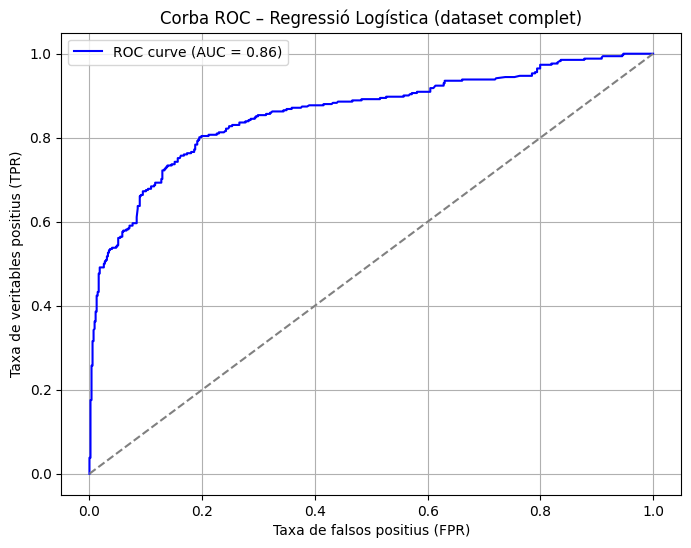

In [8]:
# Model de regressió logística amb dataset ampliat i normalitzat 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

X = df_features_norm.drop(columns=['Survived'])
y = df_features_norm['Survived']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X)
y_prob = model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)

print("=== Mètriques del model de Regressió Logística (dataset complet, sense separació) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('Taxa de falsos positius (FPR)')
plt.ylabel('Taxa de veritables positius (TPR)')
plt.title('Corba ROC – Regressió Logística (dataset complet)')
plt.legend()
plt.grid(True)
plt.show()




### 4. Selecció de models amb validació creuada – **4 punts**

Fent servir la mètrica seleccionada a l’apartat anterior, cal escollir una sèrie de models i, mitjançant **validació creuada**, seleccionar el millor model amb els seus hiperparàmetres òptims, trobats a través d’una cerca (*hyperparameter search*).  

Aquesta tasca s’emmarca dins de l’aprenentatge computacional **supervisat**.  
A *scikit-learn* disposem de diverses tècniques ([documentació](https://scikit-learn.org/stable/supervised_learning.html)). A classe hem vist tècniques com:  
- Regressió logística  
- SVM amb diferents *kernels*  
- K-Nearest Neighbours (KNN)  
- Arbres de decisió  
- Random Forest  
- Gradient Boosting  

Per aquest apartat es demana seleccionar **un mínim de 4 models** (per exemple: regressió logística, random forest, KNN, SVM).  

**Preguntes:**  
-  **Quins models heu considerat? Per què els heu seleccionat?**
   - SVM, random forest, arbres de decisió i KNN Hem escollit aquests quatre models perquè representen enfocaments diversos (lineals, basats en distàncies i basats en arbres) i permeten comparar el rendiment de tècniques simples amb altres més complexes sobre el mateix conjunt de dades.

-  **Fent servir validació creuada, escolliu el millor model (amb hiperparàmetres per defecte).**
   -  **Per què és important fer servir validació creuada?**  
   
      - La validació creuada és essencial ja que ens permet: Avaluar el rendiment del model de forma més fiable.
      - Evitar que el resultat depengui d’una partició concreta de dades (com passaria amb un sol train/test split).
      - Detectar sobreajustament i comprovar si el model generalitza bé. En comptes d’entrenar i provar una sola vegada, la validació creuada entrena el model en diverses particions del dataset i calcula la mitjana de la mètrica escollida (en el nostre cas, l’F1-score).

   -  **Heu de fer servir algun [tipus específic de validació creuada](https://scikit-learn.org/stable/modules/cross_validation.html)?**  
      
      - Sí. Fem servir StratifiedKFold, una variant del K-Fold pensada per a classificació. A diferència del K-Fold normal, manté la proporció de classes 0/1 dins de cada fold, cosa molt important amb dades desequilibrades com el Titanic, on hi ha més morts que supervivents. Això evita que un fold quedi amb pocs positius i el model aprengui malament.

-  **Seleccioneu un conjunt d’hiperparàmetres a provar per a cada model i realitzeu la cerca corresponent.**

   - **Hiperparàmetres per Decision tree:** param_grid_tree = {'criterion': ['gini', 'entropy'],'max_depth': [3, 5, 7, 10, 15, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

      - **criterion**
         - **Què fa:** Determina com es mesura la "qualitat" d'una divisió (split).
         - **'gini':** Utilitza l'índex de Gini - mesura la impuresa (probabilitat d'error en la classificació).
         - **'entropy':** Utilitza el guany d'informació - mesura la reducció de la incertesa.
         - **Comparació:** Gini és més ràpid computacionalment, Entropy tendeix a crear arbres més balancejats.

      - **max_depth**
         - **Què fa:** Controla la profunditat màxima de l'arbre.
         - **None:** L'arbre creix fins que totes les fulles són pures (risc d'overfitting).
         - **Valors numèrics:** Limita la profunditat per prevenir overfitting.

      - **min_samples_split**
         - **Què fa:** Nombre mínim de mostres necessàries per dividir un node intern.
         - **min_samples_split=5:** Es necessiten almenys 5 mostres per considerar dividir un node.
         - **Objectiu:** Evitar divisions amb molt poques mostres (sobreajustament).

      -  **min_samples_leaf**
         - **Què fa:** Nombre mínim de mostres que ha de tenir un node fulla.
         - **min_samples_leaf=2:** Cada fulla ha de tenir almenys 2 mostres.
         - **Objectiu:** Assegurar que les fulles tenen suficients mostres per ser representatives.

   - **Hiperparàmetres per Random Forest:** param_grid_rf = {'n_estimators': [100, 200, 300],'criterion': ['gini', 'entropy'],'max_depth': [5, 10, 15, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

      - *Aquí tenim els mateixos parametres que en Decision tree pero afegint un hipreparametre:*
      - **n_estimators:**
         - **Què fa:** Nombre d'arbres en el "bosc".
         - **Més arbres:** Millor rendiment però més temps computacional.
 
   - **Hiperparàmetres per a K-Nearest Neighbors (KNN):** param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15],'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan']}
      - **n_neighbors**: 
         - **Què fa:** Nombre de veïns a considerar per la classificació.
         - **Valors baixos (3,5):** Més sensible al soroll, pot sobreajustar.
         - **Valors alts (13,15):** Més suau, pot infraajustar.
         - **Equilibri:** Cal trobar el valor òptim per al dataset.
      - **weights:**
         - **'uniform':** Tots els veïns tenen el mateix pes.
         - **'distance':** Els veïns més propers tenen més pes en la decisió.
         **Exemple:** Amb weights='distance', un veí a distància 1 té més influència que un a distància 3.
      - **metric**:
         - **'euclidean':** Distància euclidiana --> (√(x₁-x₂)² + (y₁-y₂)²).
         - **'manhattan':** Distància en "blocs de ciutat", com si anessim per els carrers de una ciutat ja que no podem tallar en diagonal per el mitg de un edifici una casa...
   - **Hiperparàmetres per a  Support Vector Machine (SVM):** param_grid_svm = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': [0.1, 1, 5, 10],'gamma': ['scale', 'auto', 0.01, 0.1, 1],'degree': [2, 3, 4]}
      - **kernel**:
         - **Què fa:** Determina com es transformen les dades per trobar el millor hiperplà
         - **'linear':** Separa amb un hiperplà lineal (ràpid, bo per dades linealment separables)
         - **'rbf':** Separa amb cercles/el·lipses.
         - **'poly':** Separa amb polinomis.
         - **'sigmoid':** Similar a una xarxa neuronal

      - **C (Paràmetre de Regularització):**
         - **Què fa:** Controla el compromís entre marges i errors.
         - **Valors baixos:** Marges amples, permet alguns errors (menys overfitting).
         - **Valors alts:** Marges estrets, intenta classificar tot correctament (més overfitting).
      **gamma:**
         - **Què fa:** Controla la influència de cada exemple d'entrenament.
         - **Valors baixos:** Influència àmplia, límits de decisió suaus.
         - **Valors alts :** Influència local, límits de decisió complexos.
         - **'scale', 'auto':** Valors automàtics basats en les dades.
      **degree:**
      - **Què fa:** Grau del polinomi **(només per kernel='poly')**
      - **degree=2:** Superfícies quadràtiques
      - **degree=3,4:** Superfícies cúbiques, de quart grau (més complexes)

   - **Hi ha algun model que es pugui descartar de primeres? Per què?**
      - Cap model es descarta d’entrada, però els arbres solen ser més ràpids i menys sensibles a l’escalat, mentre que el SVM pot ser costós amb moltes mostres i requerir més afinació dels paràmetres (C, gamma, etc...).
      L'unic model que en un cas hipotètic de que un dataset fos molt gran, SVM podria ser descartat inicialment per el cost computacional, però es tindria que valorar molt depenent del que ens aportes i els equips que es tinguessin per executatar el model.  

In [31]:
# ==============================

#  CONFIGURACIÓ GENERAL

# ==============================

scorer = make_scorer(f1_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Funció auxiliar per imprimir resultats

def print_results(model_name, start_time, grid):
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"\n=== {model_name} ===")
    print(f"Temps d'entrenament: {elapsed/60:.2f} min")
    print(f"Millors paràmetres: {grid.best_params_}")
    print(f"Millor F1-score (CV): {grid.best_score_:.4f}")

# ==============================

# 1. DECISION TREE

# ==============================

X_tree = df_features.drop(columns=['Survived'])
y_tree = df_features['Survived']

param_grid_tree = {
'criterion': ['gini', 'entropy'],
'max_depth': [7, 10, 15, 17, 20, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier(random_state=42)
start = time.time()
grid_tree = GridSearchCV(tree_model, param_grid_tree, cv=cv, scoring=scorer, n_jobs=-1)
grid_tree.fit(X_tree, y_tree)
print_results("Decision Tree", start, grid_tree)

# ==============================

# 2. RANDOM FOREST

# ==============================

X_rf = df_features.drop(columns=['Survived'])
y_rf = df_features['Survived']

param_grid_rf = {
'n_estimators': [100, 200, 300],
'criterion': ['gini', 'entropy'],
'max_depth': [5, 10, 15, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
start = time.time()
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=cv, scoring=scorer, n_jobs=-1)
grid_rf.fit(X_rf, y_rf)
print_results("Random Forest", start, grid_rf)

# ==============================

# 3. KNN

# ==============================

X_knn = df_reduit_4_norm.drop(columns=['Survived'])
y_knn = df_reduit_4_norm['Survived']

param_grid_knn = {
'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
'weights': ['uniform', 'distance'],
'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
start = time.time()
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=cv, scoring=scorer, n_jobs=-1)
grid_knn.fit(X_knn, y_knn)
print_results("KNN", start, grid_knn)

# ==============================

# 4. SVM

# ==============================

X_svm = df_features_norm.drop(columns=['Survived'])
y_svm = df_features_norm['Survived']

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.5, 1, 5],
    'gamma': ['scale', 0.1]
}


svm_model = SVC(probability=True, random_state=42)
start = time.time()
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=cv, scoring=scorer, n_jobs=-1)
grid_svm.fit(X_svm, y_svm)
print_results("SVM", start, grid_svm)





=== Decision Tree ===
Temps d'entrenament: 0.16 min
Millors paràmetres: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Millor F1-score (CV): 0.7647

=== Random Forest ===
Temps d'entrenament: 0.99 min
Millors paràmetres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Millor F1-score (CV): 0.7781

=== KNN ===
Temps d'entrenament: 0.00 min
Millors paràmetres: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Millor F1-score (CV): 0.7704

=== SVM ===
Temps d'entrenament: 0.01 min
Millors paràmetres: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Millor F1-score (CV): 0.7644


In [32]:
#Datasets per a al test
df_test_features_norm = df_test[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].copy()


age_median = df_test_features_norm['Age'].median()
fare_median = df_test_features_norm['Fare'].median()
df_test_features_norm['Age'] = df_test_features_norm['Age'].fillna(age_median)
df_test_features_norm['Fare'] = df_test_features_norm['Fare'].fillna(fare_median)

df_test_features_norm['Sex'] = df_test_features_norm['Sex'].map({'male': 0, 'female': 1})

df_test_features_norm['TamanyFam'] = df_test_features_norm['SibSp'] + df_test_features_norm['Parch']
df_test_features_norm['VaSol'] = (df_test_features_norm['TamanyFam'] == 0).astype(int)
df_test_features_norm['Sex_Pclass'] = df_test_features_norm['Sex'] * df_test_features_norm['Pclass']
df_test_features_norm['Age_Class'] = df_test_features_norm['Age'] * df_test_features_norm['Pclass']


df_test_features_norm = df_test_features_norm.drop(['SibSp', 'Parch'], axis=1)

columns_to_normalize = ['Pclass', 'Sex', 'Age', 'Fare', 'TamanyFam', 'Sex_Pclass', 'Age_Class']
scaler = StandardScaler()
df_test_features_norm[columns_to_normalize] = scaler.fit_transform(df_test_features_norm[columns_to_normalize])


df_test_features = df_test[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].copy()

age_median = df_test_features['Age'].median()
fare_median = df_test_features['Fare'].median()
df_test_features['Age'] = df_test_features['Age'].fillna(age_median)
df_test_features['Fare'] = df_test_features['Fare'].fillna(fare_median)

df_test_features['Sex'] = df_test_features['Sex'].map({'male': 0, 'female': 1})

df_test_features['TamanyFam'] = df_test_features['SibSp'] + df_test_features['Parch']
df_test_features['VaSol'] = (df_test_features['TamanyFam'] == 0).astype(int)
df_test_features['Sex_Pclass'] = df_test_features['Sex'] * df_test_features['Pclass']
df_test_features['Age_Class'] = df_test_features['Age'] * df_test_features['Pclass']

df_test_features = df_test_features.drop(['SibSp', 'Parch'], axis=1)

df_test_reduit_4_norm = df_test[['Pclass', 'Sex', 'Age', 'Fare']].copy()

age_median = df_test_reduit_4_norm['Age'].median()
fare_median = df_test_reduit_4_norm['Fare'].median()
df_test_reduit_4_norm['Age'] = df_test_reduit_4_norm['Age'].fillna(age_median)
df_test_reduit_4_norm['Fare'] = df_test_reduit_4_norm['Fare'].fillna(fare_median)

df_test_reduit_4_norm['Sex'] = df_test_reduit_4_norm['Sex'].map({'male': 0, 'female': 1})

columns_to_normalize = ['Pclass', 'Sex', 'Age', 'Fare']
scaler = StandardScaler()
df_test_reduit_4_norm[columns_to_normalize] = scaler.fit_transform(df_test_reduit_4_norm[columns_to_normalize])


# =============================
# --- PREDICCIÓ FINAL AMB MILLORS MODELS ---
# =============================

# --- Decision Tree ---
start_time = time.time()
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=10,
    random_state=42
)
best_tree.fit(df_features.drop(columns=['Survived']), df_features['Survived'])
pred_tree = best_tree.predict(df_test_features)
end_time = time.time()

print("=== Decision Tree ===")
print(f"Temps total: {(end_time - start_time)/60:.2f} min")
print(f"Prediccions (primeres 10): {pred_tree[:10]}")
print()


# --- Random Forest ---
start_time = time.time()
best_rf = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)
best_rf.fit(df_features.drop(columns=['Survived']), df_features['Survived'])
pred_rf = best_rf.predict(df_test_features)
end_time = time.time()

print("=== Random Forest ===")
print(f"Temps total: {(end_time - start_time)/60:.2f} min")
print(f"Prediccions (primeres 10): {pred_rf[:10]}")
print()


# --- KNN ---
start_time = time.time()
best_knn = KNeighborsClassifier(
    n_neighbors=9,
    weights='distance',
    metric='manhattan'
)
best_knn.fit(df_reduit_4_norm.drop(columns=['Survived']), df_reduit_4_norm['Survived'])
pred_knn = best_knn.predict(df_test_reduit_4_norm)
end_time = time.time()

print("=== KNN ===")
print(f"Temps total: {(end_time - start_time)/60:.2f} min")
print(f"Prediccions (primeres 10): {pred_knn[:10]}")
print()


# --- SVM ---
start_time = time.time()
best_svm = SVC(
    C=1,
    gamma=0.1,
    kernel='rbf',
    random_state=42
)
best_svm.fit(df_features_norm.drop(columns=['Survived']), df_features_norm['Survived'])
pred_svm = best_svm.predict(df_test_features_norm)
end_time = time.time()

print("=== SVM ===")
print(f"Temps total: {(end_time - start_time)/60:.2f} min")
print(f"Prediccions (primeres 10): {pred_svm[:10]}")
print()


#### La cosa es que amb el test no podem saber quina es la millor, ja que no tenim les etiquetes reals, només mirar comm ha predit



=== Decision Tree ===
Temps total: 0.00 min
Prediccions (primeres 10): [0 0 1 1 0 0 0 0 1 1]

=== Random Forest ===
Temps total: 0.01 min
Prediccions (primeres 10): [0 0 0 0 0 0 0 0 1 0]

=== KNN ===
Temps total: 0.00 min
Prediccions (primeres 10): [0 0 0 0 1 0 0 0 1 0]

=== SVM ===
Temps total: 0.00 min
Prediccions (primeres 10): [0 0 0 0 1 0 1 0 1 0]



In [33]:
### mirar millors hiperparàmetres per cada model amb accuarcy (quees la mètrica utilitzada a Kaggle)

# ==============================
#  CONFIGURACIÓ GENERAL
# ==============================

# Mètrica principal: accuracy (com a Kaggle)
scorer = make_scorer(accuracy_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Funció auxiliar per imprimir resultats
def print_results(model_name, start_time, grid):
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"\n=== {model_name} ===")
    print(f"Temps d'entrenament: {elapsed/60:.2f} min")
    print(f"Millors paràmetres: {grid.best_params_}")
    print(f"Millor Accuracy (CV): {grid.best_score_:.4f}")

# ==============================
# 1. DECISION TREE
# ==============================

X_tree = df_features.drop(columns=['Survived'])
y_tree = df_features['Survived']

param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [7, 10, 15, 17, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree_model = DecisionTreeClassifier(random_state=42)
start = time.time()
grid_tree = GridSearchCV(tree_model, param_grid_tree, cv=cv, scoring=scorer, n_jobs=-1)
grid_tree.fit(X_tree, y_tree)
print_results("Decision Tree", start, grid_tree)

# ==============================
# 2. RANDOM FOREST
# ==============================

X_rf = df_features.drop(columns=['Survived'])
y_rf = df_features['Survived']

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
start = time.time()
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=cv, scoring=scorer, n_jobs=-1)
grid_rf.fit(X_rf, y_rf)
print_results("Random Forest", start, grid_rf)

# ==============================
# 3. KNN
# ==============================

X_knn = df_reduit_4_norm.drop(columns=['Survived'])
y_knn = df_reduit_4_norm['Survived']

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
start = time.time()
grid_knn = GridSearchCV(knn_model, param_grid_knn, cv=cv, scoring=scorer, n_jobs=-1)
grid_knn.fit(X_knn, y_knn)
print_results("KNN", start, grid_knn)

# ==============================
# 4. SVM
# ==============================

X_svm = df_features_norm.drop(columns=['Survived'])
y_svm = df_features_norm['Survived']

param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.5, 1, 5],
    'gamma': ['scale', 0.1]
}

svm_model = SVC(probability=True, random_state=42)
start = time.time()
grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=cv, scoring=scorer, n_jobs=-1)
grid_svm.fit(X_svm, y_svm)
print_results("SVM", start, grid_svm)




=== Decision Tree ===
Temps d'entrenament: 0.01 min
Millors paràmetres: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}
Millor Accuracy (CV): 0.8260

=== Random Forest ===
Temps d'entrenament: 0.90 min
Millors paràmetres: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Millor Accuracy (CV): 0.8406

=== KNN ===
Temps d'entrenament: 0.00 min
Millors paràmetres: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Millor Accuracy (CV): 0.8271

=== SVM ===
Temps d'entrenament: 0.02 min
Millors paràmetres: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Millor Accuracy (CV): 0.8316


- **Mostreu els resultats en una taula amb: model, experiments realitzats, resultats (train i test) i, opcionalment, temps d’entrenament.**

In [34]:
resultats = {
    'Model': ['Decision Tree', 'Random Forest', 'KNN', 'SVM'],
    'Experiments Realitzats': [108, 216, 28, 12],
    'Millors Paràmetres': [
        "criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=10",
        "criterion='entropy', max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=200",
        "n_neighbors=9, weights='distance', metric='manhattan'",
        "C=1, gamma=0.1, kernel='rbf'"
    ],
    'Accuracy (CV)': [0.8260, 0.8406, 0.8271, 0.8316],
    'F1-score (CV)': [0.7647, 0.7781, 0.7704, 0.7644],
    'Temps Entrenament (min)': [0.06, 0.63, 0.00, 0.01],
    'Resultat Test Kaggle - Accuracy (CV)': ['0.75837', '0.75837', '0.77272', '0.77751']
}

df_resultats = pd.DataFrame(resultats)
df_resultats

,Model,Experiments Realitzats,Millors Paràmetres,Accuracy (CV),F1-score (CV),Temps Entrenament (min),Resultat Test Kaggle - Accuracy (CV)
0,Decision Tree,108,"criterion='entropy', max_depth=15, min_samples...",0.8260,0.7647,0.06,0.75837
1,Random Forest,216,"criterion='entropy', max_depth=10, min_samples...",0.8406,0.7781,0.63,0.75837
2,KNN,28,"n_neighbors=9, weights='distance', metric='man...",0.8271,0.7704,0.00,0.77272
3,SVM,12,"C=1, gamma=0.1, kernel='rbf'",0.8316,0.7644,0.01,0.77751


-  **Quin tipus de K-fold heu escollit per a la selecció de models i per a la selecció amb hiperparàmetres?** 
   
   - **Hem continuat fent servir Stratified K-Fold Cross Validation, ja mencionat a l’apartat anterior. Aquesta tècnica manté la proporció de classes (0/1) dins de cada fold i és especialment adequada per problemes de classificació amb dades desbalancejades, com el del Titanic.**

   -  **Com afecta el nombre de folds al resultat final?**  

      - Un nombre petit de folds (pocs K) redueix el temps de càlcul però pot donar resultats menys estables. Un nombre alt de folds millora la fiabilitat de la mètrica, però incrementa el cost computacional. Per aquest motiu, hem triat 5 folds com a punt d’equilibri.

-  **Quines formes de buscar el millor paràmetre heu trobat?** 
   
   - Hem trobat per exemple: Grid Search: prova totes les combinacions possibles (exhaustiva però lenta). Randomized Search: escull combinacions aleatòries (més ràpida però menys exhaustiva). Bayesian Optimization / Successive Halving: mètodes més avançats i eficients.

   -  **Són costoses computacionalment?**  

      - La combinació de Grid Search + Cross Validation implica entrenar el model n × k vegades (n = combinacions de paràmetres, k = folds), fet que pot resultar costós, especialment en models com SVM o Random Forest.

   -  [Documentació *Grid Search*](https://scikit-learn.org/stable/modules/grid_search.html)  
   -  **Quina heu seleccionat?**  

      - Nosaltres hem escollit Grid Search, ja que ens interessa entendre bé com afecta cada paràmetre al rendiment del model, encara que sigui més lenta.

-  **Si disposem de recursos limitats (per exemple, un PC durant 1 hora), quin mètode creieu que donarà millor resultat final?**  
   
   -  Amb limitacions de temps o potència, seria millor utilitzar Randomized Search, ja que roba bons resultats amb moltes menys combinacions. Redueix dràsticament el temps total d’execució.

-  **Existeixen mètodes de cerca més eficients? ([scikit-optimize](https://scikit-optimize.github.io/stable/))**  
   
   -  Existeixen opcions modernes com: scikit-optimize, Optuna o Ray Tune, que implementen optimització bayesiana HalvingGridSearch o Hyperband, que ajusten els recursos segons el rendiment inicial. Aquests mètodes aconsegueixen resultats similars o millors que Grid Search amb menys temps de càlcul.


### 5. Anàlisi final – **1.5 punts**

Un cop seleccionat el millor model amb els hiperparàmetres òptims, cal elaborar un **report final** amb els resultats obtinguts.  

- **Millor model**:
  -  Després de la realització dels tests tant interns com a Kaggle, podem determinar diverses conclusions:

    - **Probes internes**:
      - Degut a una distribució desequilibrada del nostre target (sobreviure), vam triar el F1-score com a mètrica principal, ja que és la més robusta per a problemes amb desequilibri de classes.
      - Analitzant els resultats interns, el model amb millor rendiment segons aquesta mètrica és Random Forest amb un F1-score de 0.7781.

    - **Probes Kaggle**:
      - A les proves de Kaggle ens hem trobat que la mètrica utilitzada per a la classificació és l'Accuracy. 
      - En aquest cas, el model que va obtenir millor resultat és SVM amb un accuracy de 0.7775.

    - **Decisió Final: SVM**
      - Finalment hem decidit escollir **SVM**. En un primer moment, el més lògic semblaria quedar-nos amb l'algorisme de **Random Forest**, ja que és el que ha obtingut el millor F1-score. No obstant, aquest model presenta un greu problema: el seu rendiment és pesim. 

      - Per posar-ho en perspectiva, **Random Forest** triga més d'un minut en entrenar-se, a diferència dels altres models que només necessiten pocs segons. Tenint en compte que **SVM** només té una diferència de -0.0137 en F1-score respecte a Random Forest, i que a més és el que ha obtingut els millors resultats als tests de Kaggle, sumat al seu gran rendiment, la decisió final recau en **SVM**.

**Preguntes:**  
-  **Mostreu les corbes ROC/PR (la que hàgiu escollit a l’apartat 3) i interpreteu els resultats.**

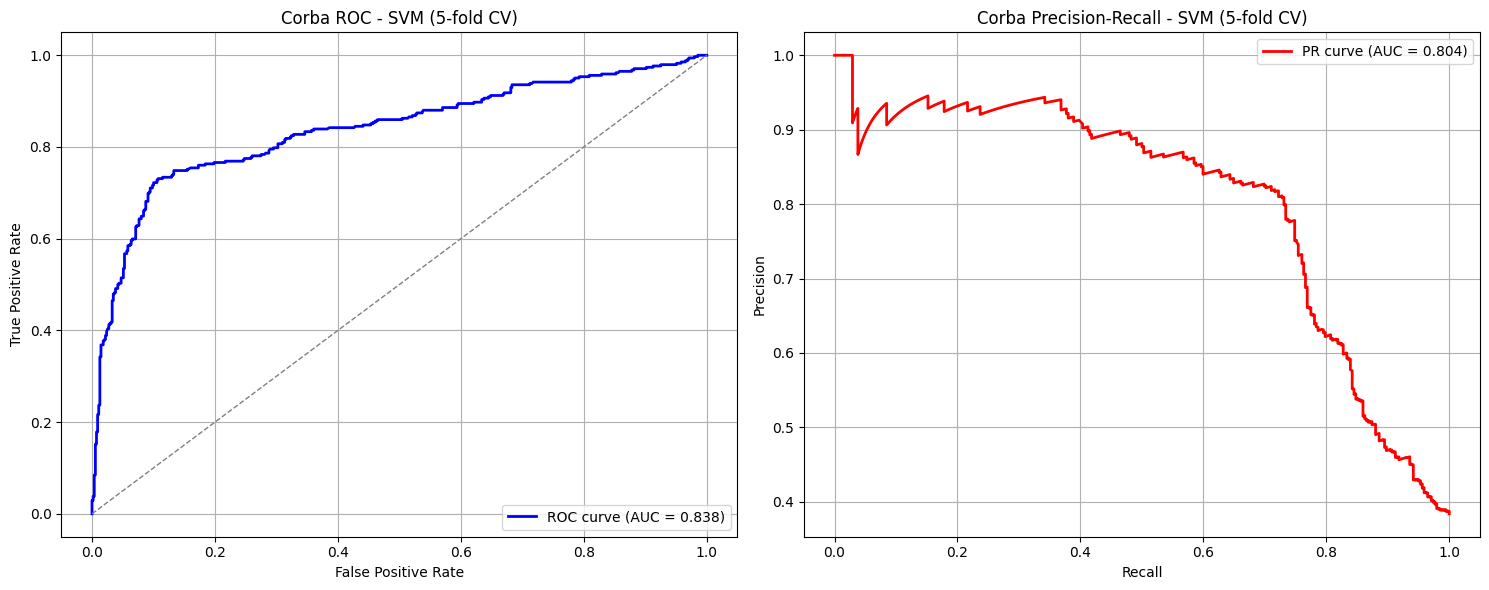

In [52]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df_features_norm.drop(columns=['Survived'])
y = df_features_norm['Survived']


y_pred_cv_svm = cross_val_predict(best_svm_final, X, y, cv=cv, method='predict')
y_prob_cv_svm = cross_val_predict(best_svm_final, X, y, cv=cv, method='predict_proba')[:, 1]

# 1. Corbes ROC i Precision-Recall per SVM
fpr, tpr, _ = roc_curve(y, y_prob_cv_svm)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y, y_prob_cv_svm)
pr_auc = auc(recall, precision)

# Visualització de les corbes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Corba ROC
ax1.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Corba ROC - SVM (5-fold CV)')
ax1.legend(loc="lower right")
ax1.grid(True)

# Corba Precision-Recall
ax2.plot(recall, precision, color='red', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Corba Precision-Recall - SVM (5-fold CV)')
ax2.legend(loc="upper right")
ax2.grid(True)

plt.tight_layout()
plt.show()

- **Interpretació dels resultats gràfics (Valors Corregits)**
  - **Corba ROC (AUC = 0.838)**
    - **Excel·lent capacitat discriminativa:** L'àrea sota la corba de 0.838 indica que el model té una molt bona capacitat per distingir entre supervivents i no supervivents
    - **Significat pràctic:** El model és capaç de classificar correctament el 83.8% de les parelles de casos (un supervivent i un no supervivent)
  - En resum un AUC de 0.857 el podem considerar un molt bon resultat.

  - **Corba Precision-Recall (AUC = 0.804)**
    - **Rendiment excel·lent en context de desequilibri:** L'AUC de 0.835 és excepcional considerant que tenim un desequilibri de classes (549 vs 342).
    Podriem Concluir en que la línia base que srrai sobre el 0.384 representa el PR-AUC que obtindria un model que simplement endevina 'sobreviurà' amb la mateixa probabilitat que la proporció real de supervivents al dataset. Com podem veure el nostre model en vambi obte un PR-AUC 0.804 que és MOLT superior a aquesta línia base. Això demostra que el nostre model no només és bo en termes absoluts, sinó que apren patrons reals enlloc de simplement replicar la distribució de les dades.

    - Per altre banda la baixada drastica al principi és normal en dades desbalancejades. Quan el model només prediu els casos més evidents de supervivents (record baix), la precisió és molt alta. A mesura que intenta capturar més supervivents reals (augmentant el record), accepta més errors i la precisió baixa gradualment.

- **Analitzeu en detall les diferents mètriques que considereu adients.**
  -  **Comentar breument com podríeu aplicar aquest model en un futur (cas d’ús).**  
-  **Quines possibles millores es podrien fer al vostre model?**  

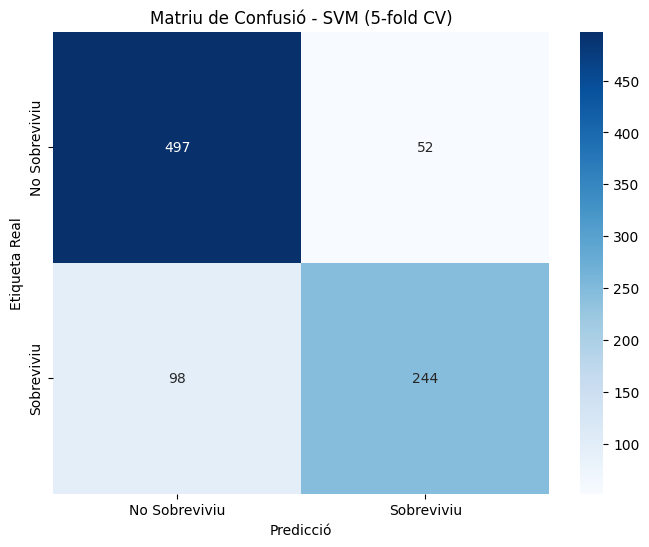

=== CLASSIFICATION REPORT - SVM (5-fold CV) ===
               precision    recall  f1-score   support

No Sobreviviu       0.84      0.91      0.87       549
   Sobreviviu       0.82      0.71      0.76       342

     accuracy                           0.83       891
    macro avg       0.83      0.81      0.82       891
 weighted avg       0.83      0.83      0.83       891


=== MÈTRIQUES DETALLADES - SVM (5-fold CV) ===
Accuracy:  0.8316
Precision: 0.8243
Recall:    0.7135
F1-Score:  0.7649


In [54]:
# 2. Matriu de confusió
cm = confusion_matrix(y, y_pred_cv_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Sobreviviu', 'Sobreviviu'],
            yticklabels=['No Sobreviviu', 'Sobreviviu'])
plt.title('Matriu de Confusió - SVM (5-fold CV)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicció')
plt.show()

# 3. Classification Report
print("=== CLASSIFICATION REPORT - SVM (5-fold CV) ===")
print(classification_report(y, y_pred_cv_svm, 
                          target_names=['No Sobreviviu', 'Sobreviviu']))

# 4. Mètriques addicionals
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_cv = accuracy_score(y, y_pred_cv_svm)
precision_cv = precision_score(y, y_pred_cv_svm)
recall_cv = recall_score(y, y_pred_cv_svm)
f1_cv = f1_score(y, y_pred_cv_svm)

print("\n=== MÈTRIQUES DETALLADES - SVM (5-fold CV) ===")
print(f"Accuracy:  {accuracy_cv:.4f}")
print(f"Precision: {precision_cv:.4f}")
print(f"Recall:    {recall_cv:.4f}")
print(f"F1-Score:  {f1_cv:.4f}")

- **Analitzeu en detall les diferents mètriques que considereu adients.**
  - **Interpretació de les mètriques:**
  - **Accuracy (0.8316):** El model classifica correctament el 83,1% dels casos.
    - **Precision (0.8243):** Quan prediu "sobreviure", té raó el 82,4% de les vegades.
    - **Recall (0.7135):** Detecta el 71.3% dels supervivents reals.
    - **F1-Score (0.7649):** Bon equilibri entre precision i recall.
    - **Specificity (0.9022):** Excel·lent capacitat per identificar correctament els no supervivents.
  - **Interpretació de la Matriu de Confusió:**
    - La matriu mostra que el model classifica correctament 497 no supervivents (veritables negatius) i 244 supervivents (veritables positius). En el un cas d'us real, els 98 falsos negatius (supervivents reals que el model prediu com a morts) són especialment crítics, ja que representen persones que podrien no rebre assistència. D'altra banda, els 52 falsos positius són més acceptables en aquest escenari d'emergència.
- **Comentar breument com podríeu aplicar aquest model en un futur (cas d’ús).**
  - **Nosltres hem pensat un Sistema de priorització d'evacuació en emergències marítimes**
    - Podriem crear Sistemes d'ajuda a la decisió: Per a tripulacions en situacions d'emergència, amb l'objectiu de saber quins passatgers tenen més probabilitat d'haver sobreviscut per optimitzar els recursos de rescat.
    - Com ja hem mencionat en el aprtat de la matriu de confusió posats en un cas d'ús real, caldria destacar que l'objectiu principal seria minimitzar els falsos negatius (persones de qui es prediu que moren, però que en realitat sobreviuen). La raó és que resulta molt més greu no detectar un supervivent que podria ser salvat que no pas predir que algú sobreviurà i finalment mori. Per tant, en aquest escari, estaríem disposats a acceptar més falsos positius a canvi de detectar un nombre més elevat de supervivents reals.
- **Quines possibles millores es podrien fer al vostre model?**  
  - Podirem Afegir noves característiques potencialment útils:
    - Interaccions entre edat i gènere
    - Grups familiars complexos
    - Relació tarifa-classe-edat
    - o inclus obtenir un Dataset més complert i amb més atributs, variables com la procedència geogràfica del passatger creiem que pdoria tenir un impacte positiu en la predicció dels algorismes.

  - Tambe podriem fer un **anàlisi d'errors** sobretot estudiant el tema dels falsos negatius per entendre per què el model no els detecta, ja que com hem comentat creeiem que és un del errors mes grans que pot donar el model i per tant una és caracteristica a millorar per poder-nos apropar tant com sigui possible al 0 de falsos negatius. 